In [146]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('paper', font_scale=1.5)
red, blue, green, purple = sns.color_palette('Set1', 4)
fontdict = dict(size=14)

# Result 2

In [147]:
b = 1.3
v = 1
TA = 0.4
ΔT = np.linspace(TA-1+1e-10, TA-1e-10, 1000)
TB = TA - ΔT
assert ((0<=TB) & (TB<=1)).all()

α = 0
# α = 0.7

In [148]:
γ1 = (b*v*α*TA + (TA - TB)) / (v * (1 - TB))
γ2 = (b*v*α*TB + (1 + b) * (TA - TB)) / (v * (1 - TB) + (1 - v) * (TA - TB))

c = np.linspace(0, 1, 1001).reshape((-1, 1))
pstar = (c * (1 - TB) - b * α * TA - (TA - TB)) / (b * (1 - α) * (TA - TB))

pstar = np.minimum(pstar, 1)
pstar = np.maximum(pstar, 0)
ΔT.shape, c.shape, pstar.shape

((1000,), (1001, 1), (1001, 1000))

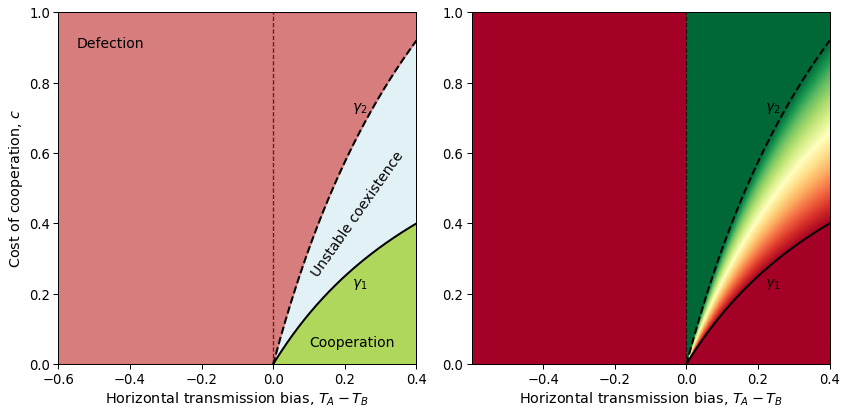

In [149]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

ax = axes[0]
ax.plot(ΔT, γ1, '-k', lw=2)
ax.plot(ΔT, γ2, '--k', lw=2)
ax.axvline(0, color='k', ls='--', alpha=0.7)

pos = ΔT>0
ax.fill_between(ΔT[pos], 0, γ1[pos], color='yellowgreen', alpha=0.8)
ax.fill_between(ΔT[~pos], 0, γ2[~pos], color='yellowgreen', alpha=0.8)
ax.fill_between(ΔT[pos], γ2[pos], 1, color='indianred', alpha=0.8)
ax.fill_between(ΔT[~pos], γ1[~pos], 1, color='indianred', alpha=0.8)
ax.fill_between(ΔT[~pos], γ2[~pos], γ1[~pos], color='gold', alpha=0.5)
ax.fill_between(ΔT[pos], γ1[pos], γ2[pos], color='lightblue', alpha=0.35)

ax.set(xlim=(ΔT.min(), ΔT.max()), ylim=(0, 1), 
       xticks=np.linspace(ΔT.min(), ΔT.max(), 6),
       xlabel='Horizontal transmission bias, $T_A - T_B$',
       ylabel='Cost of cooperation, $c$',
)
ax.text(-0.55, 0.9, 'Defection', fontdict=fontdict, rotation=0)
ax.text(0.1, 0.05, r'Cooperation', fontdict=fontdict, rotation=0)
if α == 0.7:
    ax.text(-0.33, 0.03, 'Stable coexistence', fontdict=dict(fontsize=12), rotation=70)
    ax.text(0.1, 0.69, r'Unstable coexist.', fontdict=dict(fontsize=12), rotation=25)    
if α == 0:
    ax.text(0.1, 0.25, r'Unstable coexistence', fontdict=fontdict, rotation=55)

ax = axes[1]
im = ax.pcolormesh(ΔT, c, pstar, cmap='RdYlGn', alpha=0.5, rasterized=True)
# plt.colorbar(im, label='Frequency of $A$ at equilibrium, $p^*$', ax=ax)
ax.plot(ΔT, γ1, '-k', lw=2)
ax.plot(ΔT, γ2, '--k', lw=2)
ax.axvline(0, color='k', ls='--', alpha=0.7)
ax.set(xlim=(ΔT.min(), ΔT.max()), ylim=(0, 1), 
       xlabel='Horizontal transmission bias, $T_A - T_B$',
)

for ax in axes:
    if α == 0:
        ax.text(0.22, 0.22, r'$\gamma_1$', fontdict=fontdict)
        ax.text(0.22, 0.72, r'$\gamma_2$', fontdict=fontdict)
    if α == 0.7:
        ax.text(0.22, 0.675, r'$\gamma_1$', fontdict=fontdict)
        ax.text(0.22, 0.875, r'$\gamma_2$', fontdict=fontdict)

fig.tight_layout()
#if α == 0.7: fig.savefig('Figures/Result2__non_zero_alpha.pdf')
#if α == 0: fig.savefig('Figures/Result2_zero_alpha.pdf')

## Corollary 5

In [150]:
c = 0.35

α = np.linspace(1e-10, 1-1e-10, 1001).reshape((-1, 1))
pstar = (c * (1 - TB) - b * α * TA - (TA - TB)) / (b * (1 - α) * (TA - TB))
####
# my fix: p* <- 1-p*
pstar[:, ΔT>0] *= -1
pstar[:, ΔT>0] += 1
#####
pstar = np.minimum(pstar, 1)
pstar = np.maximum(pstar, 0)
ΔT.shape, α.shape, pstar.shape

((1000,), (1001, 1), (1001, 1000))

In [151]:
a1 = (c * (1 - TB) - (1 + b) * (TA - TB)) / (b * TB)
a2 = (c * (1 - TB) - (TA - TB))/(b * TA)

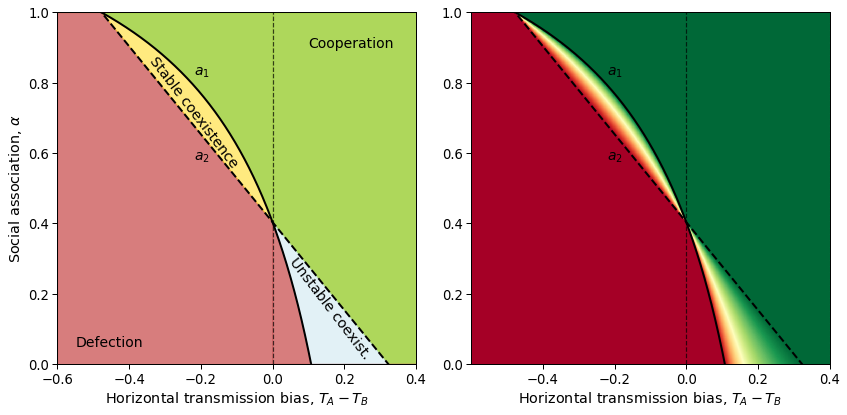

In [152]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

ax = axes[0]
ax.plot(ΔT[a1<0] , a1[a1<0], '-k', lw=2)
ax.plot(ΔT[a1>0] , a1[a1>0], '-k', lw=2)
ax.plot(ΔT,  a2, '--k', lw=2)
ax.axvline(0, color='k', ls='--', alpha=0.7)

pos = ΔT>0
ax.fill_between(ΔT[pos],  1,       a2[pos],  color='yellowgreen', alpha=0.8)
ax.fill_between(ΔT[~pos], 1,       a1[~pos], color='yellowgreen', alpha=0.8)
ax.fill_between(ΔT[pos],  a1[pos],           color='indianred', alpha=0.8)
ax.fill_between(ΔT[~pos], a2[~pos],          color='indianred', alpha=0.8)
ax.fill_between(ΔT[~pos], a2[~pos],a1[~pos], color='gold', alpha=0.5)
ax.fill_between(ΔT[pos],  a1[pos], a2[pos],  color='lightblue', alpha=0.35)

ax.text(-0.55, 0.05, 'Defection', fontdict=fontdict, rotation=0)
ax.text(0.1, 0.9, r'Cooperation', fontdict=fontdict, rotation=0)
ax.text(-0.35, 0.56, 'Stable coexistence', rotation=-52.5)
ax.text(0.04, 0.015, r'Unstable coexist.', rotation=-52.5)

ax.set(xlim=(ΔT.min(), ΔT.max()), ylim=(0, 1),
       xticks=np.linspace(ΔT.min(), ΔT.max(), 6),
       xlabel='Horizontal transmission bias, $T_A - T_B$',
       ylabel=r'Social association, $\alpha$',
)

ax = axes[1]
im = ax.pcolormesh(ΔT, α, pstar, cmap='RdYlGn', alpha=0.5, rasterized=True)
# plt.colorbar(im, label='Frequency of $A$ at equilibrium, $p^*$', ax=ax)
ax.plot(ΔT, a1, '-k', lw=2)
ax.plot(ΔT, a2, '--k', lw=2)
ax.axvline(0, color='k', ls='--', alpha=0.7)
ax.set(xlim=(ΔT.min(), ΔT.max()), ylim=(0, 1), 
       xlabel='Horizontal transmission bias, $T_A - T_B$',
)

for ax in axes:
    ax.text(-0.22, 0.82, r'$a_1$', fontdict=fontdict)
    ax.text(-0.22, 0.58, r'$a_2$', fontdict=fontdict)

fig.tight_layout()
#fig.savefig('Figures/Result2__alpha_on_y_axis.pdf')

# Recurrence

0.4924242424242424
0.4923076923076921


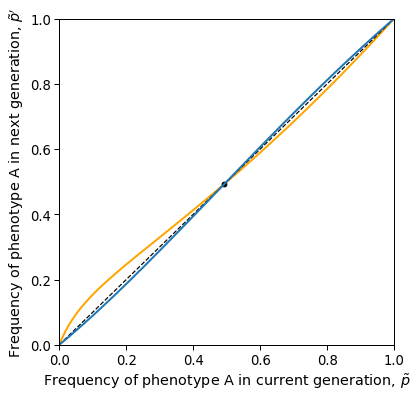

In [153]:
b=12
c = 0.35
T_A = 0.4
T_B = 0.9
α = 0.45

def p_parents_function(p):
    x1 = (p ** 2)*(1+b-c)*(1-(1-p)*(1-α)*T_B)
    x2 = p*(1-p)*(1-c)*(p*(1-α)*T_B+1-T_B)
    x3 = p*(1-p)*(1+b)*(p*(1-α)+α)*T_A
    x4 = ((1-p)**2)*p*(1-α)*T_A
    omega = 1+p*(b-c)
    p_parents = (x1+x2+x3+x4)/omega
    return p_parents

p_equilibrium = (c*(1-T_B)-α*b*T_A-(T_A-T_B))/(b*(1-α)*(T_A-T_B))
print(p_equilibrium)

p = np.arange(0, 1, 0.001)
p_tag = p_parents_function(p)

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(p, p_tag, color="orange", linewidth=2)
ax.plot(p, p, 'k--')
#plt.plot(β3/β1, β3/β1, "ko", label = r'$\tilde{p}^*$')
ax.set_xlabel(r'Frequency of phenotype A in current generation, $\tilde{p}$')
ax.set_ylabel(r"Frequency of phenotype A in next generation, $\tilde{p}'$")
ax.set_ylim(0, 1)
ax.set_xlim(0, 1)


b=1.3
c = 0.904
T_A = 0.5
T_B = 0.1
α = 0.4
p_equilibrium = (c*(1-T_B)-α*b*T_A-(T_A-T_B))/(b*(1-α)*(T_A-T_B))
print(p_equilibrium)
plt.plot(p_equilibrium, p_equilibrium, "ko", label = r'$\tilde{p}^*$')

p_tag = p_parents_function(p)
ax.plot(p, p_tag, linewidth = 2)
fig.savefig('Figures/coexistence_without_oblique.pdf')

# Result 3
## T_B > T_A

In [154]:
TB = 0.7
TA = 0.5
b = 2
α = 0.7

In [155]:
vhat = (TB - TA) / (1 - TA)

In [156]:
v = np.linspace(1e-10, 1-1e-10, 1000)

In [157]:
γ1 = (b * v * α * TA + (TA - TB)) / (v * (1 - TB))
γ1[np.isinf(γ1)] = -100
γ2 = (b * v * α * TB + (1 + b) * (TA - TB)) / (v * (1 - TB) + (1 - v) * (TA - TB))

In [158]:
c = np.linspace(0, 1, 1001).reshape((-1, 1))
β1 = (c * (1-v) - b * (1-α*v)) * (TA - TB)
β3 = α * b * v * TA - c * v * (1-TB) +(TA-TB)

pstar = β3 / β1
pstar = np.minimum(pstar, 1)
pstar = np.maximum(pstar, 0)

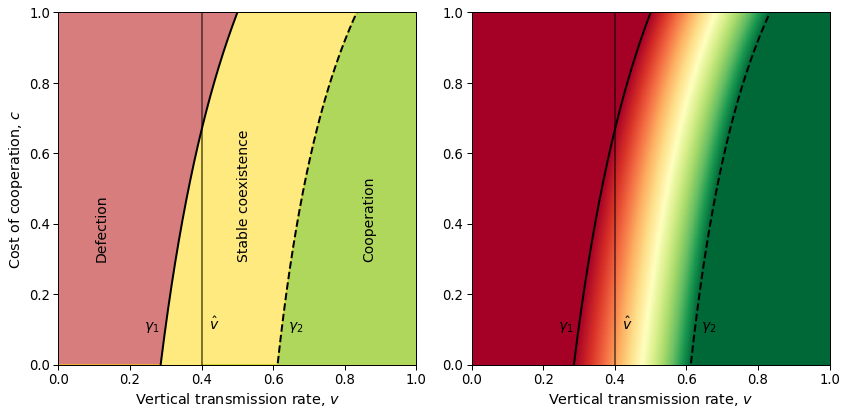

In [159]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

ax = axes[0]
ax.plot(v, γ1, '-k', lw=2)
# γ2>1 when v<vhat for these parameter values
ax.plot(v[v>vhat], γ2[v>vhat], '--k', lw=2)
ax.axvline(vhat, ls='-', color='k', alpha=0.5, lw=2)

# iii.b v<vhat, γ2<c : irrelevant for these parameters.
ix = v<=vhat
ax.fill_between(v[ix], γ2[ix], 1, color='yellowgreen', alpha=0.8)
# # iii.a, v>vhat, c<γ2
ix = v>vhat
ax.fill_between(v[ix], 0, γ2[ix], color='yellowgreen', alpha=0.8)
# vi, γ1<c 
ax.fill_between(v, 1 ,γ1, color='indianred', alpha=0.8) 

# vii.a, v<vhat, c<γ2 and c<γ1
ix = v<=vhat
ax.fill_between(v[ix], np.minimum(γ1[ix], γ2[ix]), color='gold', alpha=0.5)
# # vii.b, v>vhat, γ2<c<γ1
ix = v>vhat
ax.fill_between(v[ix], γ2[ix], γ1[ix], color='gold', alpha=0.5)

ax.set(
    ylabel='Cost of cooperation, $c$',
    xlabel='Vertical transmission rate, $v$',
    ylim=(0, 1),
    xlim=(0, 1)
)

ax.text(0.85, 0.3, r'Cooperation', fontdict=fontdict, rotation=90)
ax.text(0.1, 0.3, r'Defection', fontdict=fontdict, rotation=90)
ax.text(0.5, 0.3, r'Stable coexistence', fontdict=fontdict, rotation=90)

ax = axes[1]
# cmaps: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
im = ax.pcolormesh(v, c, pstar, cmap='RdYlGn', alpha=0.75, rasterized=True)
# plt.colorbar(im, label='Frequency of $A$ at equilibrium, $p^*$', ax=ax)
ax.plot(v, γ1, '-k', lw=2)
# γ2>1 when v<vhat for these parameter values
ax.plot(v[v>vhat], γ2[v>vhat], '--k', lw=2)
ax.axvline(vhat, ls='-', color='k', alpha=0.5, lw=2)
ax.set(
#     ylabel='Cost of cooperation, $c$',
    xlabel='Vertical transmission rate, $v$',
    ylim=(0, 1),
    xlim=(0, 1)
)

for ax in axes:
    ax.text(0.24, 0.1, r'$\gamma_1$', fontdict=fontdict)
    ax.text(0.64, 0.1, r'$\gamma_2$', fontdict=fontdict)
    ax.text(0.42, 0.1, r'$\hat v$', fontdict=fontdict)

fig.tight_layout()
#fig.savefig('Figures/result3.pdf')

In [160]:
TB = 0.4
TA = 0.5
b = 1.2
α = 0.4

In [161]:
vhat = (TB - TA) / (1 - TA)
v = np.linspace(1e-10, 1-1e-10, 1000)

In [162]:
γ1 = (b * v * α * TA + (TA - TB)) / (v * (1 - TB))
γ1[np.isinf(γ1)] = -100
γ2 = (b * v * α * TB + (1 + b) * (TA - TB)) / (v * (1 - TB) + (1 - v) * (TA - TB))

In [163]:
c = np.linspace(0, 1, 1001).reshape((-1, 1))
β1 = (c * (1-v) - b * (1-α*v)) * (TA - TB)
β3 = α * b * v * TA - c * v * (1-TB) +(TA-TB)

pstar = β3 / β1
pstar = np.minimum(pstar, 1)
pstar = np.maximum(pstar, 0)

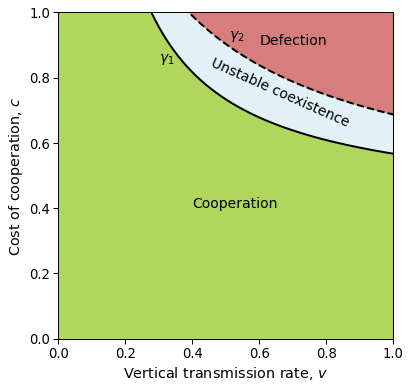

In [164]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(v, γ1, '-k', lw=2)
# γ2>1 when v<vhat for these parameter values
ax.plot(v[v>vhat], γ2[v>vhat], '--k', lw=2)
ax.axvline(vhat, ls='-', color='k', alpha=0.5, lw=2)

## ii. c<γ1
ax.fill_between(v, γ1, color='yellowgreen', alpha=0.8)

## v. c > γ2
ax.fill_between(v, 1, γ2, color='indianred', alpha=0.8)

## viii. γ1 < c < γ2
ax.fill_between(v, γ1, γ2, color='lightblue', alpha=0.35)



ax.set(ylabel='Cost of cooperation, $c$',
    xlabel='Vertical transmission rate, $v$',
    ylim=(0, 1),
    xlim=(0, 1)
)

ax.text(0.4, 0.4, r'Cooperation', fontdict=fontdict)
ax.text(0.6, 0.9, r'Defection', fontdict=fontdict)
ax.text(0.45, 0.65, r'Unstable coexistence', fontdict=fontdict, rotation = -24)

#ax = axes[1]
# cmaps: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
#im = ax.pcolormesh(v, c, pstar, cmap='RdYlGn', alpha=0.75, rasterized=True)
#plt.colorbar(im, label='Frequency of $A$ at equilibrium, $p^*$', ax=ax)
#ax.plot(v, γ1, '-k', lw=2)
# γ2>1 when v<vhat for these parameter values
#ax.plot(v, γ2, '--k', lw=2)
#ax.set(
#     ylabel='Cost of cooperation, $c$',
#     xlabel='Vertical transmission rate, $v$',
#     ylim=(0, 1),
#     xlim=(0, 1)
#)

#for ax in axes:
ax.text(0.3, 0.85, r'$\gamma_1$', fontdict=fontdict)
ax.text(0.51, 0.92, r'$\gamma_2$', fontdict=fontdict)

#fig.tight_layout()
fig.savefig('Figures/Result3_positive_bias.pdf')

# Time graphs

In [ ]:
### T_A = T_B = T
### alpha <> 0

def evolution0(p0, b, c, T_A, T_B, alpha, tmax):
    p = [p0]

    for t in range(1, tmax):
        p_old = p[t-1] 
        x1 = (p_old ** 2)*(1+b-c)*(1-(1-p_old)*(1-alpha)*T_B)
        x2 = p_old*(1-p_old)*(1-c)*(p_old*(1-alpha)*T_B+1-T_B)
        x3 = p_old*(1-p_old)*(1+b)*(p_old*(1-alpha)+alpha)*T_A
        x4 = ((1-p_old)**2)*p_old*(1-alpha)*T_A
        omega = 1+p_old*(b-c)
        result = (x1+x2+x3+x4)/omega
        p.append(result)
        if result > 1:
            break

    return p

p0 = 0.5
c = 0.1
T_A =0.2
T_B = 0.2
alpha = 0.5
generations = 1000

b = 0.7
plt.plot(evolution0(p0, b, c, T_A, T_B, alpha, generations), label=r'$\frac{b}{c} < \frac{1-T}{\alpha T}$')
b = 0.8
plt.plot(evolution0(p0, b, c, T_A, T_B, alpha, generations), label=r'$\frac{b}{c} = \frac{1-T}{\alpha T}$')
b = 0.9
plt.plot(evolution0(p0, b, c, T_A, T_B, alpha, generations), label=r'$\frac{b}{c} > \frac{1-T}{\alpha T}$')
plt.legend()
plt.xlabel('Generations')
plt.ylabel(r'Frequency of $A$ among parents, $\tilde{p}$')
plt.ylim(0, 1)
plt.xlim(0, generations);
plt.savefig('Figures/Time_Figure_Equal_Horizontal.pdf')

In [ ]:
### Only vertical, alpha = 0

b = 1.3
c = 0.65
T_A = 0.5
T_B = 0.1
alpha = 0
generations = 150

p_star = c*(1-T_B)/(b*(T_A-T_B))-1/b
print(p_star)
plt.plot(evolution0(p_star-0.1, b, c, T_A, T_B, alpha, generations), label=r'$p_0 < p^{*}$')
plt.plot(evolution0(p_star, b, c, T_A, T_B, alpha, generations), label=r'$p_0 = p^{*}$')
plt.plot(evolution0(p_star+0.1, b, c, T_A, T_B, alpha, generations), label=r'$p_0 > p^{*}$')
plt.legend()
plt.xlabel('Generations')
plt.ylabel(r'Frequency of $A$ among parents, $\tilde{p}$')
plt.ylim(0, 1)
plt.xlim(0, generations);
plt.savefig('Figures/Time_Figure_Only_Vertical_No_Alpha.pdf')

In [ ]:
#### v = 0

def evolution2(p0, b, c, T_A, T_B, alpha, tmax):
    p = [p0]

    for t in range(1, tmax):
        p_old = p[t-1] 
        x1 = (p_old**2)*(alpha+(1-alpha)*(p_old+(1-p_old)*(1-T_B)))
        x2 = p_old*(1-p_old)*(alpha*(1-T_B)+(1-alpha)*(p_old+(1-p_old)*(1-T_B)))
        x3 = p_old*(1-p_old)*(alpha*T_A+(1-alpha)*p_old*T_A)
        x4 = ((1-p_old)**2)*p_old*(1-alpha)*T_A
        result = (x1+x2+x3+x4)
        p.append(result)
        if result > 1:
            break

    return p

p0 = 0.5
b = 1.3
c = 0.5
T_A = 0.5
alpha = 0.5
generations = 150

T_B = T_A + 0.1 # 0.6
plt.plot(evolution2(p0, b, c, T_A, T_B, alpha, generations), label=r'$T_A < T_B$')

T_B = T_A # 0.5
plt.plot(evolution2(p0, b, c, T_A, T_B, alpha, generations), label=r'$T_A = T_B$')

T_B = T_A - 0.1 # 0.4
plt.plot(evolution2(p0, b, c, T_A, T_B, alpha, generations), label=r'$T_A > T_B$')


plt.legend()
plt.xlabel('Generations')
plt.ylabel('Frequency of $A$ among adults, $p$')
plt.ylim(0, 1)
plt.xlim(0, generations);
plt.savefig('Figures/Time_Figure_No_Vertical.pdf')